In [13]:
from agents.random_caller_random_player import RandomCallerRandomPlayer
from agents.rule_based_bot import RuleBasedBot
from agents.decision_bot_1 import DecisionBot1
from src.utils import card_to_int, clean_data_for_call_decision_training

In [11]:
from src.game import Game

# Set up a game with all rule based bots and find average scores
scores = [0, 0, 0, 0]
games = 10000
all_call_data = []
all_wanted_and_tooks = []
calling_model = 'calling_model1000_epochs_2023-08-07 19:15:52.371904'
scaler = '2023-08-07 19:15:52.908292scaler'

for i in range(games):
    game = Game(players_in=[RuleBasedBot(0), RuleBasedBot(1), DecisionBot1(2, calling_model, scaler), DecisionBot1(3, calling_model, scaler)])
    game.reset()
    while not game.done:
        game.step(card_to_int(game.players[0].play(game.to_obs())))
        # game.step(random.choice(range(44)))
    scores = [scores[i] + game.players[i].score for i in range(4)]
    # combine the two lists
    all_call_data.extend(game.call_data)
    all_wanted_and_tooks.extend(game.wanted_and_tooks)
scores = [(score / games) / 100 for score in scores]

for i, score in enumerate(scores):
    print(("Player {num}: %.2f" % score).format(num=i))
print("Xishtis: " + str(game.info["xishti"]))
print("Busts: " + str(game.info["bust"]))
print("Successes: " + str(game.info["success"]))
# print("Failed Calls" + str(game.wanted_and_tooks))

Player 0: 7.23
Player 1: 6.97
Player 2: 6.63
Player 3: 7.20
Xishtis: 11
Busts: 42
Successes: 43


In [8]:
len(all_call_data)

960000

In [12]:
from datetime import datetime
df = clean_data_for_call_decision_training(all_call_data)
df.to_csv('../data/' + str(games) + '_games_' + str(datetime.now()) + '.csv', index=False)
df

,dealt,desired,first_to_play,dealer,wild_suit,player0desired,player1desired,player2desired,player3desired,result,hand1,hand2,hand3,hand4,hand5,hand6,hand7,hand8,hand9,deciding_player
0,1,0,1,0,3,-1,0,0,0,1,3,44,44,44,44,44,44,44,44,0
2,1,0,1,0,3,-1,0,-1,-1,1,10,44,44,44,44,44,44,44,44,2
3,1,0,1,0,3,-1,0,0,-1,1,34,44,44,44,44,44,44,44,44,3
4,2,0,1,1,2,-1,2,0,0,1,18,19,44,44,44,44,44,44,44,0
5,2,2,1,1,2,-1,-1,-1,-1,1,32,28,44,44,44,44,44,44,44,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959989,9,1,0,0,2,2,-1,-1,-1,1,17,34,30,21,12,10,18,29,3,1
959991,9,2,0,0,2,2,1,2,-1,1,23,7,24,27,6,5,25,11,13,3
959994,9,1,3,1,2,3,2,-1,2,1,29,8,15,14,9,1,19,3,27,2
959996,9,3,1,2,2,-1,1,2,2,1,31,12,14,28,34,18,21,20,3,0


In [3]:
# print the most common elements in game.wanted_and_tooks

print("Most common wanted and tooks:")
from collections import Counter
print(Counter(all_wanted_and_tooks).most_common(10))
 

Most common wanted and tooks:
[((0, 1), 835), ((1, 2), 750), ((1, 0), 709), ((1, 3), 421), ((2, 1), 405), ((0, 2), 375), ((2, 3), 335), ((2, 4), 209), ((2, 0), 181), ((1, 4), 174)]


<AxesSubplot: >

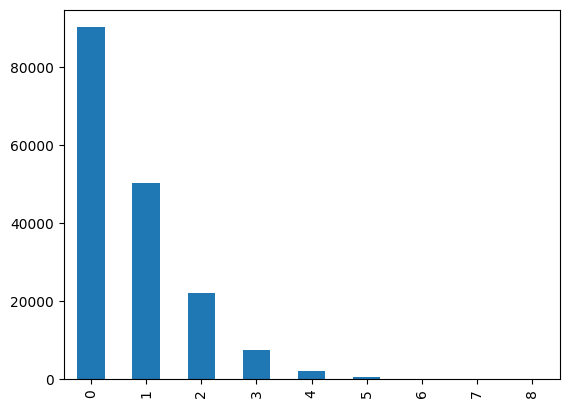

In [9]:
df['desired'].value_counts().plot(kind='bar')

In [4]:
import torch
output= [1, 2, 3]

# turn output into a tensor
output = torch.FloatTensor(output)

output.argmax().item()

2